# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Data Imports

In [2]:
data = pd.read_csv('/Users/bhaveshjain/code/arthurcornelio88/how-happy-in-europe/arthurcornelio88-notebooks/20240319_ESS10_manually-filtered_arthurcornelio88.csv')
data = data.drop("Unnamed: 0", axis=1)
data= data.drop(['livecnta','gndr13','yrbrn6','yrbrn7','yrbrn8','yrbrn9','yrbrn10','yrbrn11','yrbrn12','yrbrn13','rshipa8','rshipa9','rshipa10','rshipa11','rshipa12', 'rshipa13',
                    'edulvlb','pdjobyr','isco08','edulvlpb','isco08p','wkhtotp','edulvlfb','edulvlfb','edulvlmb','anctry1','anctry2','cntbrthd', 'lnghom1', 'lnghom2', 'fbrncntc', 'mbrncntc', 'vteubcmb', 'gndr9', 'gndr10','gndr11', 'gndr12','rshpsmk', 'rshpsgb', 'marstmk', 'marstgb'], axis=1)
mask = data["happy"].isin([77, 88, 99])
data = data[~mask].reset_index(drop=True)
data.head()

/var/folders/pz/ztpbvhgj24n__rpw0bq8mxkc0000gn/T/ipykernel_79935/3334417692.py:1: DtypeWarning: Columns (82,88,90) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/bhaveshjain/code/arthurcornelio88/how-happy-in-europe/arthurcornelio88-notebooks/20240319_ESS10_manually-filtered_arthurcornelio88.csv')


,idno,cntry,netusoft,ppltrst,pplfair,pplhlp,polintr,psppsgva,actrolga,psppipla,...,vdtpitre,vdtpscre,vdtpaure,vdtpvire,vdtpoire,vdtpntre,vdtpapre,vdtprere,vdtpdkre,vdtpnare
0,10038,BE,5,6,7,4,2,2,1,3,...,0,0,0,0,0,0,1,0,0,0
1,10053,BE,5,3,4,3,4,1,4,2,...,0,0,0,0,0,1,0,0,0,0
2,10055,BE,5,6,8,5,2,3,3,3,...,0,0,0,0,0,0,1,0,0,0
3,10062,BE,5,7,5,5,4,2,1,2,...,0,0,0,0,0,0,1,0,0,0
4,10064,BE,5,3,8,8,1,2,2,2,...,0,0,0,0,0,0,1,0,0,0


In [3]:
data['happy'].value_counts()

happy
8     10182
7      7434
9      5439
10     3930
6      3811
5      3647
4      1227
3       951
2       462
0       245
1       193
Name: count, dtype: int64

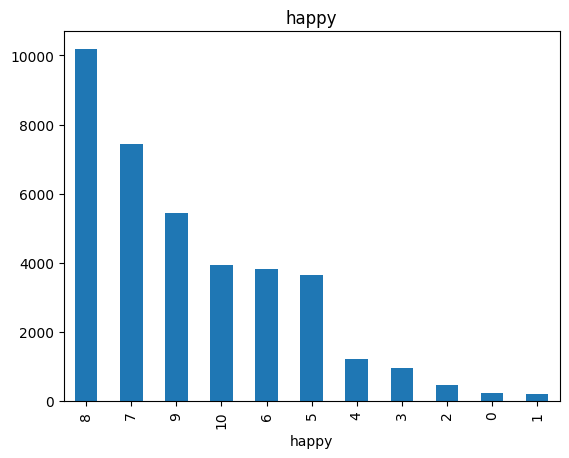

In [4]:
# Bar chart of data['happy'], unique values
data['happy'].value_counts().plot(kind='bar')
plt.title('happy')
plt.show()

# Data Cleaning

In [5]:
# columns have null values > 0
listnull1 = data.columns[data.isnull().sum() > 0]

In [6]:
listnull1

Index(['vteurmmb', 'gndr7', 'gndr8', 'rshipa7', 'cmsrv', 'cmsrvp'], dtype='object')

In [7]:
# Count of null values in each column with null values > 0
data[listnull1].isnull().sum()

vteurmmb    9222
gndr7       2794
gndr8       6020
rshipa7     2794
cmsrv       1589
cmsrvp      1589
dtype: int64

In [8]:
# Distribution of the polintr
data['polintr'].value_counts()

polintr
3    13387
2    11815
4     8813
1     3422
8       43
7       28
9       13
Name: count, dtype: int64

In [9]:
# Count the value 77 in each columns of data > 100
for col in data.columns:
    if (data[col] == 88).sum() > 100:
        print(col, (data[col] == 88).sum())

pplfair 176
pplhlp 102
trstprl 574
trstlgl 479
trstplc 168
trstplt 364
trstprt 464
trstep 2070
trstun 2543
trstsci 490
lrscale 3374
stfeco 594
stfgov 603
stfdem 712
stfedu 1605
stfhlth 225
euftf 2290
imbgeco 877
imueclt 825
imwbcnt 918
inprdsc 298
atchctr 122
atcherp 355
rlgdgr 158
pray 244
ccnthum 901
ccrdprs 694
testic34 432
testic35 400
testic36 465
testic40 466
testic41 436
testic42 506
vteurmmb 1268
fairelc 424
dfprtal 965
medcrgv 538
rghmgpr 580
votedir 816
cttresa 310
gptpelc 843
gvctzpv 311
grdfinc 526
viepol 1202
wpestop 823
keydec 1247
fairelcc 975
dfprtalc 1504
medcrgvc 786
rghmgprc 1082
votedirc 1270
cttresac 1093
gptpelcc 1562
gvctzpvc 504
grdfincc 1048
viepolc 1431
wpestopc 1306
keydecc 2150
chpldmi 199
chpldmc 1785
stpldmc 123
implvdm 394
accalaw 1114
eduyrs 331
wkdcorga 186
iorgact 269
nacer2 689
tporgwk 112
hincsrca 141
hinctnta 2381
occf14b 820
occm14b 435
mcclose 1264
mcinter 1878
mccoord 1621
mcpriv 1585
mcmsinf 1739
chldo12 107
agepnt 227
c19sppnt 102
stfmjob 104
j

In [10]:
# columns778899 is list of columns if any of the value is 77, 88, 99
columns778899 = data.columns[data.isin([77, 88, 99]).any()]
columns778899

Index(['ppltrst', 'pplfair', 'pplhlp', 'trstprl', 'trstlgl', 'trstplc',
       'trstplt', 'trstprt', 'trstep', 'trstun',
       ...
       'panclobo', 'panresmo', 'gvhanc19', 'gvjobc19', 'gveldc19', 'gvfamc19',
       'hscopc19', 'gvbalc19', 'gvimpc19', 'vdovexre'],
      dtype='object', length=158)

In [11]:
listnull = data.columns[data.isnull().sum() > 0]
listnull

Index(['vteurmmb', 'gndr7', 'gndr8', 'rshipa7', 'cmsrv', 'cmsrvp'], dtype='object')

In [12]:
# count the null values in columns where null values > 0, eliminate the columns where null values = 0 in data
for col in listnull:
    print(col, data[col].isnull().sum())


vteurmmb 9222
gndr7 2794
gndr8 6020
rshipa7 2794
cmsrv 1589
cmsrvp 1589


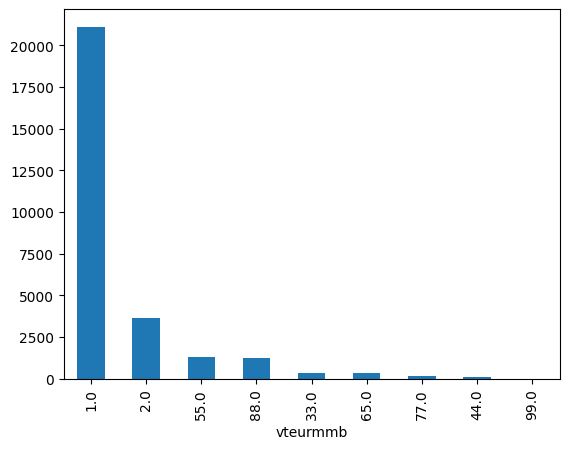

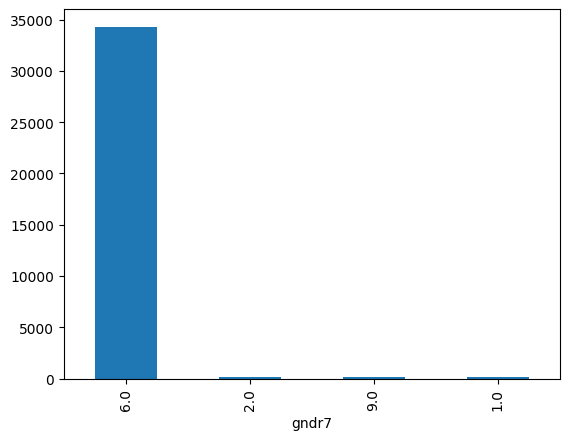

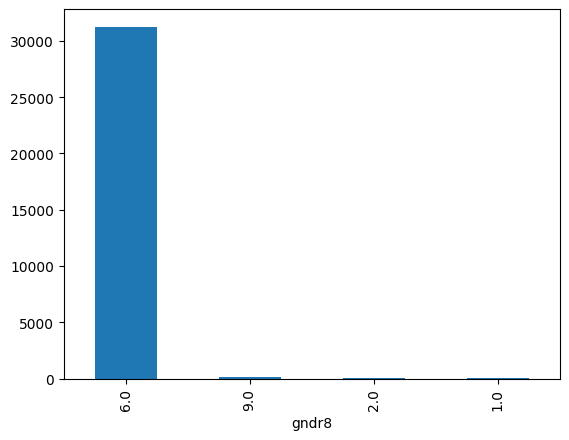

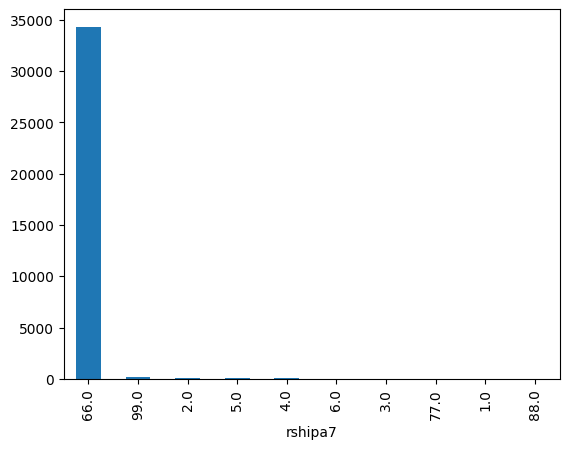

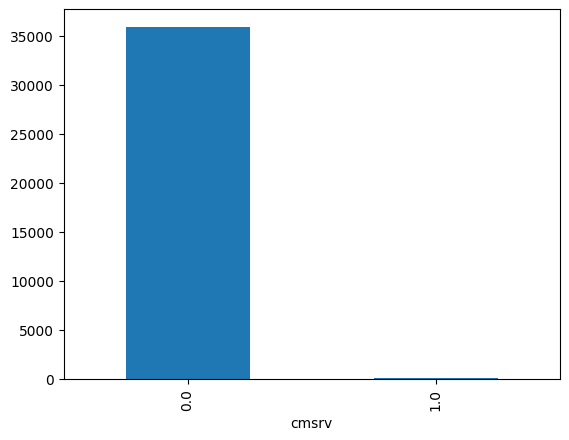

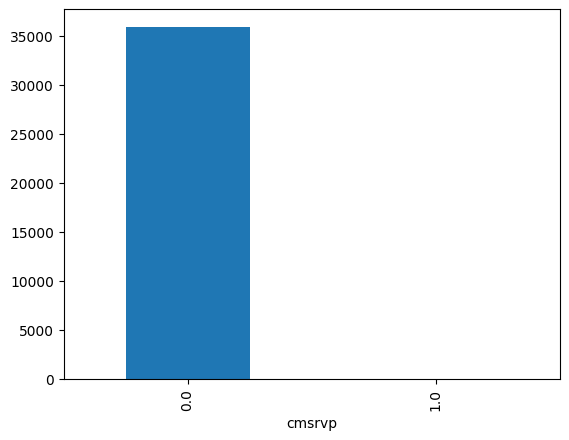

In [13]:
# listnull unique values bar chart
for col in listnull:
    data[col].value_counts().plot(kind='bar')
    plt.show()


In [14]:
# For columns in listnull fill the null values with the mode of the column
for col in listnull:
    data[col].fillna(data[col].mode()[0], inplace=True)


/var/folders/pz/ztpbvhgj24n__rpw0bq8mxkc0000gn/T/ipykernel_79935/163049031.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


Till here we deleted all null values where were in default in the dataset

In [15]:
for col in listnull:
    print(col, data[col].isnull().sum())

vteurmmb 0
gndr7 0
gndr8 0
rshipa7 0
cmsrv 0
cmsrvp 0


Now we deal with 77,88,99,7,8,9 where people did not wanna answer,refused, etc

In [16]:
# In all columns replace 77, 88, 99 with np.nan
data = data.replace([77, 88, 99], np.nan)

In [17]:
len(data.columns[data.isnull().sum() > 0])

158

Almost half of the columns have the values 77, 88, 99 

In [18]:
listnull = data.columns[data.isnull().sum() > 0]
# Append 'happy' to listnull
listnull = listnull.append(pd.Index(['happy']))
listnull

Index(['ppltrst', 'pplfair', 'pplhlp', 'trstprl', 'trstlgl', 'trstplc',
       'trstplt', 'trstprt', 'trstep', 'trstun',
       ...
       'panresmo', 'gvhanc19', 'gvjobc19', 'gveldc19', 'gvfamc19', 'hscopc19',
       'gvbalc19', 'gvimpc19', 'vdovexre', 'happy'],
      dtype='object', length=159)

In [19]:
len(listnull) # Just checking

159

In [20]:
numerical_columns = data.select_dtypes(include=np.number).columns
for col in numerical_columns:
    if col not in listnull:  # Check if column name is not in listnull
        mode_value = data[col].mode().values[0]  # Calculate mode of the column
        if mode_value < 10:  # Check if mode is less than 10
            data[col] = data[col].replace([7, 8, 9], np.nan)

Till here we replaced all values where the person refused to answer etc to -1

In [21]:
data.columns[data.isnull().sum() > 0]

Index(['netusoft', 'ppltrst', 'pplfair', 'pplhlp', 'polintr', 'psppsgva',
       'actrolga', 'psppipla', 'cptppola', 'trstprl',
       ...
       'gvimpc19', 'gvconc19', 'respc19', 'reshhc19', 'icvacc19', 'getavc19',
       'getnvc19', 'vdcond', 'vdovexre', 'vdtype'],
      dtype='object', length=289)

In [22]:
data['happy'].value_counts()


happy
8     10182
7      7434
9      5439
10     3930
6      3811
5      3647
4      1227
3       951
2       462
0       245
1       193
Name: count, dtype: int64

In [23]:
# NaN values in categorical columns
categorical_columns = data.select_dtypes(include='object').columns
# count NaN values in categorical columns
for col in categorical_columns:
    print(col, data[col].isna().sum())

cntry 0
region 0


In [24]:
data.columns[data.isnull().sum() > 0]

Index(['netusoft', 'ppltrst', 'pplfair', 'pplhlp', 'polintr', 'psppsgva',
       'actrolga', 'psppipla', 'cptppola', 'trstprl',
       ...
       'gvimpc19', 'gvconc19', 'respc19', 'reshhc19', 'icvacc19', 'getavc19',
       'getnvc19', 'vdcond', 'vdovexre', 'vdtype'],
      dtype='object', length=289)

Mode Imputation

In [25]:
# replace NaM with mode of the column and store the main dataset in mode_data
mode_data = data.fillna(data.mode().iloc[0])
mode_data

,idno,cntry,netusoft,ppltrst,pplfair,pplhlp,polintr,psppsgva,actrolga,psppipla,...,vdtpitre,vdtpscre,vdtpaure,vdtpvire,vdtpoire,vdtpntre,vdtpapre,vdtprere,vdtpdkre,vdtpnare
0,10038,BE,5.0,6.0,7.0,4.0,2.0,2.0,1.0,3.0,...,0,0,0,0,0,0,1,0,0,0
1,10053,BE,5.0,3.0,4.0,3.0,4.0,1.0,4.0,2.0,...,0,0,0,0,0,1,0,0,0,0
2,10055,BE,5.0,6.0,8.0,5.0,2.0,3.0,3.0,3.0,...,0,0,0,0,0,0,1,0,0,0
3,10062,BE,5.0,7.0,5.0,5.0,4.0,2.0,1.0,2.0,...,0,0,0,0,0,0,1,0,0,0
4,10064,BE,5.0,3.0,8.0,8.0,1.0,2.0,2.0,2.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37516,27808,SK,2.0,5.0,5.0,5.0,4.0,3.0,2.0,2.0,...,0,0,0,0,0,0,1,0,0,0
37517,27826,SK,4.0,7.0,6.0,6.0,2.0,3.0,3.0,2.0,...,0,0,0,0,0,0,1,0,0,0
37518,27834,SK,2.0,0.0,0.0,2.0,2.0,3.0,3.0,1.0,...,0,0,0,0,0,0,1,0,0,0
37519,27846,SK,5.0,2.0,2.0,3.0,4.0,3.0,1.0,2.0,...,0,0,0,0,0,0,1,0,0,0


In [26]:
# Count of NaN values in each column where NaN values > 0
mode_data.isnull().sum()[mode_data.isnull().sum() > 0] # Just Checking

Series([], dtype: int64)

Median Imputation

In [27]:
# for NaN in numeric columns in data, replace NaN with mean of the column and store in mean_data
numeric_columns = data.select_dtypes(include='number').columns
mean_data = data.copy()
for column in numeric_columns:
    mean_data[column].fillna(mean_data[column].mean(), inplace=True)
#print(mean_data.head())

/var/folders/pz/ztpbvhgj24n__rpw0bq8mxkc0000gn/T/ipykernel_79935/3627661200.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mean_data[column].fillna(mean_data[column].mean(), inplace=True)


In [28]:
mean_data.columns[mean_data.isnull().sum() > 0]

Index([], dtype='object')

# Feature Selection

Working with Mode Data

In [29]:
data_2 = mode_data.copy()

If One value in a column has taken up 90% of the distribution, we will remove those columns

In [30]:
threshold = 0.80
most_frequent_percentage = data_2.apply(lambda x: x.value_counts(normalize=True).max(), axis=0)
columns_to_remove = most_frequent_percentage[most_frequent_percentage >= threshold].index
data_2 = data_2.drop(columns=columns_to_remove)
print(data_2.head())

    idno cntry  netusoft  ppltrst  pplfair  pplhlp  polintr  psppsgva  \
0  10038    BE       5.0      6.0      7.0     4.0      2.0       2.0   
1  10053    BE       5.0      3.0      4.0     3.0      4.0       1.0   
2  10055    BE       5.0      6.0      8.0     5.0      2.0       3.0   
3  10062    BE       5.0      7.0      5.0     5.0      4.0       2.0   
4  10064    BE       5.0      3.0      8.0     8.0      1.0       2.0   

   actrolga  psppipla  ...  hscopc19  gvbalc19  gvimpc19  gvconc19  respc19  \
0       1.0       3.0  ...       8.0       2.0       7.0       4.0      2.0   
1       4.0       2.0  ...       5.0       6.0       4.0       3.0      3.0   
2       3.0       3.0  ...       8.0       5.0       7.0       5.0      3.0   
3       1.0       2.0  ...       8.0       5.0       9.0       5.0      3.0   
4       2.0       2.0  ...       9.0       5.0       9.0       5.0      1.0   

   reshhc19  hapnoc19  getavc19  vdcond  vdovexre  
0       1.0         1       2.0   

# Split Data

Working with data_2

In [35]:
X = data_2.drop('happy',axis=1)
y = data_2['happy']

In [37]:
# Drop Categorical columns in X
X = X.select_dtypes(exclude='object')


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [72]:
# Dense Neural Network for Regression and round the predicted values to the nearest integer
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from scikeras.wrappers import KerasRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import RMSprop


In [85]:
def dense_model(num_classes):
    model = Sequential()
    model.add(Dense(512, input_shape=(266,), activation='relu', kernel_initializer='he_normal'))
    model.add(Dense(256, activation='sigmoid'))
    model.add(Dense(256, activation='sigmoid'))
    model.add(Dense(128, activation='sigmoid'))
    model.add(Dense(64, activation='sigmoid'))
    model.add(Dense(32, activation='sigmoid'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')
    return model

In [88]:
num_classes = len(np.unique(y_train))

model = multi_class_model(num_classes)

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=512, validation_split=0.2)

# Predict probabilities for each class
y_pred_probabilities = model.predict(X_test)

# Convert probabilities to predicted classes
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy score
print("Accuracy Score:", accuracy)

Epoch 1/10


/Users/bhaveshjain/.pyenv/versions/3.10.6/envs/how-happy-in-europe/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.1185 - loss: 510.8013 - val_accuracy: 0.1764 - val_loss: 61.6441
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1740 - loss: 47.2258 - val_accuracy: 0.1802 - val_loss: 34.0124
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1689 - loss: 37.6500 - val_accuracy: 0.2219 - val_loss: 21.2550
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1731 - loss: 23.7524 - val_accuracy: 0.1880 - val_loss: 31.1538
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1701 - loss: 29.2613 - val_accuracy: 0.1309 - val_loss: 32.2678
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1664 - loss: 28.1890 - val_accuracy: 0.1704 - val_loss: 16.6562
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1693 - loss: 17.3384 - val_accuracy: 0.1899 - val_loss: 12.5183
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1763 - loss: 13.3175 - val_accuracy: 0.229

In [90]:
# Print the confusion matrix
print("Confusion Matrix:")
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))


Confusion Matrix:
Predicted   0  4    5   6   7     8   9   10   All
True                                              
0           0  0   14   0   0    29   0    1    44
1           0  0    4   0   0    26   0    0    30
2           0  0   20   1   1    61   1    2    86
3           0  0   30   2   0   165   3    2   202
4           2  0   35   1   0   200   3    6   247
5           3  0  103   2   9   589  10    8   724
6           2  0   77   7   6   633   4   11   740
7           0  0  105   2  13  1350  12   36  1518
8           3  3  125   0  20  1885  16   20  2072
9           0  0   53   2   7  1004  10   12  1088
10          0  0   40   2  16   678   9    9   754
All        10  3  606  19  72  6620  68  107  7505


In [50]:
#num_classes = len(np.unique(y_train))
#model = multi_class_model(num_classes)
#probabilities = model.predict(X_test)
#predicted_classes = np.argmax(probabilities, axis=1)
#predicted_classes

2024-03-22 12:46:33.384071: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [60]:
model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2727 - loss: 1.9439 - val_accuracy: 0.2658 - val_loss: 1.9531
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2670 - loss: 1.9525 - val_accuracy: 0.2658 - val_loss: 1.9475
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2756 - loss: 1.9443 - val_accuracy: 0.2667 - val_loss: 1.9609
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2706 - loss: 1.9475 - val_accuracy: 0.2658 - val_loss: 1.9478
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2757 - loss: 1.9495 - val_accuracy: 0.2710 - val_loss: 1.9384
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2729 - loss: 1.9455 - val_accuracy: 0.2710 - val_loss: 1.9390
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2725 - loss: 1.9438 - val_accuracy: 0.2673 - val_loss: 1.9474
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2737 - loss: 1.9480 - val_accu

Regression Model

In [67]:
def regression_model():
    model = Sequential()
    model.add(Dense(256, input_shape=(266,), activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='linear'))  # Use linear activation for regression
    model.compile(loss='mean_squared_error', optimizer=Adam())
    return model


def clip_predictions(predictions, min_val, max_val):
    return np.clip(predictions, min_val, max_val)

model = regression_model()

/Users/bhaveshjain/.pyenv/versions/3.10.6/envs/how-happy-in-europe/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [69]:
model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2)
# Evaluate the model on test data
test_loss = model.evaluate(X_test, y_test)

# Predict on test data
predictions = model.predict(X_test)

# Clip predictions to be within the range [0, 10]
predictions = clip_predictions(predictions, 0, 10)

# Print test loss
print("Test Loss:", test_loss)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 12.7212 - val_loss: 4.3721
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.4226 - val_loss: 11.5899
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.3685 - val_loss: 6.6737
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.0913 - val_loss: 11.7493
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.8585 - val_loss: 4.0438
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.3262 - val_loss: 11.5097
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 15.0658 - val_loss: 9.8722
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 10.1996 - val_loss: 11.9047
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 11.5019 - val_loss: 40.9002
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 15.8566 - val_loss: 5.6827
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.5645 - val_loss: 6.3255
Epoch 12/100
188/188 ━━━━━━━━━━

In [66]:
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2)

# # Evaluate the model on test data
# test_loss = model.evaluate(X_test, y_test)

# # Predict on test data and round to the nearest integer
# predictions = model.predict(X_test)
# rounded_predictions = [int(round(pred)) for pred in predictions]

# # Print test loss
# print("Test Loss:", test_loss)

predictions = model.predict(X_test)

# Round each prediction to the nearest integer
rounded_predictions = np.rint(predictions).astype(int)

# Calculate accuracy
accuracy = np.mean(rounded_predictions == y_test)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, rounded_predictions)

# Print test loss, accuracy, and mean absolute error
print("Test Loss:", test_loss)
print("Accuracy:", accuracy)
print("Mean Absolute Error:", mae)

Epoch 1/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 84.7085 - val_loss: 68.1800
Epoch 2/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 351.2027 - val_loss: 39.3186
Epoch 3/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 42.7216 - val_loss: 48.9392
Epoch 4/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 161.7326 - val_loss: 142.0609
Epoch 5/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 458.9534 - val_loss: 34.3669
Epoch 6/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 832.9467 - val_loss: 105.9319
Epoch 7/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 54.6952 - val_loss: 21.3712
Epoch 8/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 82.9471 - val_loss: 1078.8639
Epoch 9/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 793.9528 - val_loss: 15.4151
Epoch 10/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 188.3426 - val_loss: 52.3494
Epoch 11/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 67.1965 - val_loss: 44.6750
Epoch 12/

ValueError: Data must be 1-dimensional, got ndarray of shape (7505, 7505) instead